passing step ./ad_prof/amp_50_long/HGB.out2.00600.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00650.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00700.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00750.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00800.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00850.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00900.athdf
all files verified
322


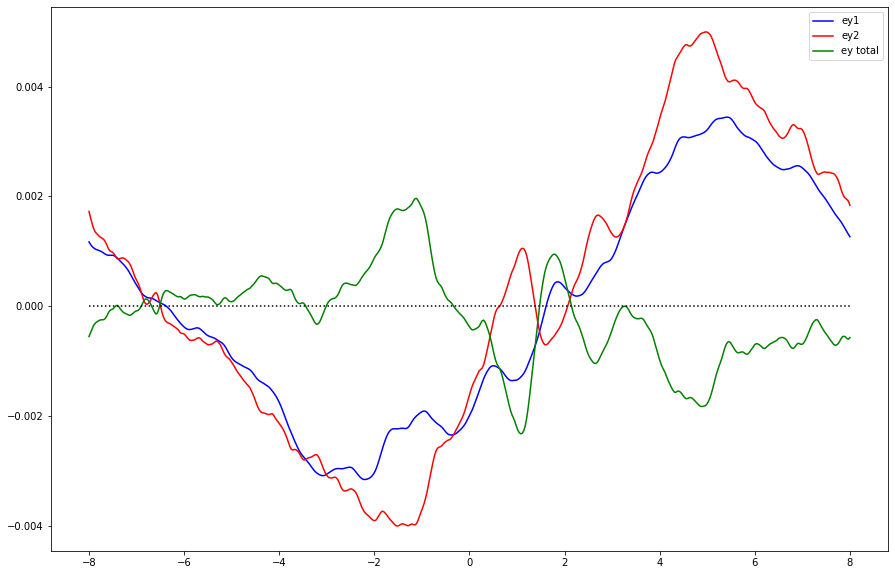

In [4]:
import sys
import time
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read


def ey_field(file_name):
    #return in order the two y components of b cross v 
    data = []
    data = athena_read.athdf(file_name)
    #print(data)
    #for 8x8x1 scale height box, with cubic cells, needs to be adjusted for other sizes
    side_length = 1/len(data['x3v'])
    #print(side_length,' side length')
    volume = side_length**3
    
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    
    vx = data['vel1']
    vz = data['vel3']
    bx = data['Bcc1']
    bz = data['Bcc3']
    vxbz = np.sum(vx*bz,axis=(0,1))/(Nz*Ny)
    vzbx = np.sum(vz*bx,axis=(0,1))/(Nz*Ny)
    return vzbx,vxbz #ey1 and ey2 as in bai/stone zonal flow paper (2014)
ey1_total =[]
ey2_total =[]
for i in range(600,922):
    #implement from zhaohuan
    #filename=base+"%03d" % number+'.vtk'
    file_name= ('./ad_prof/amp_50_long/HGB.out2.00%03d.athdf'%i)
    #print(file_name)
    data = athena_read.athdf(file_name)
    if i%50==0:
        print('passing step',file_name)
    ey1,ey2 = ey_field(file_name)
    #convert to numpy arrays
    ey1_total.append(ey1)
    ey2_total.append(ey2)
print('all files verified')
ey1_total = np.array(ey1_total)
ey2_total = np.array(ey2_total)
print(len(ey2_total))
ey1 = np.array([np.mean(k) for k in zip(*ey1_total)])
ey2 = np.array([np.mean(k) for k in zip(*ey2_total)])
x_arr = np.linspace(-8,8,512)
y_arr = np.zeros(512)
plt.figure(figsize=(15,10))
plt.plot(x_arr,ey1,c='b',label='ey1')
plt.plot(x_arr,ey2,c='r',label='ey2')
plt.plot(x_arr,ey1-ey2,c='g',label='ey total')
plt.plot(x_arr,y_arr,'k:')
plt.legend()